#### Import of Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

Data Tinkering Functions

In [174]:
#df=df.drop(columns=["at1"])
#df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)
def valueChange(columnLabel):
    for j in columnLabel:
        y = df[j]
        clas = y.unique()
        for i in range(len(clas)):
            df[j]=df[j].replace(clas[i],i)
        

#### Dataset

In [175]:
df = pd.read_csv('datasets/poker/poker.csv')
df=df.head(900)

In [176]:
df.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [177]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      900 non-null    int64
 1   C1      900 non-null    int64
 2   S2      900 non-null    int64
 3   C2      900 non-null    int64
 4   S3      900 non-null    int64
 5   C3      900 non-null    int64
 6   S4      900 non-null    int64
 7   C4      900 non-null    int64
 8   S5      900 non-null    int64
 9   C5      900 non-null    int64
 10  Class   900 non-null    int64
dtypes: int64(11)
memory usage: 77.5 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

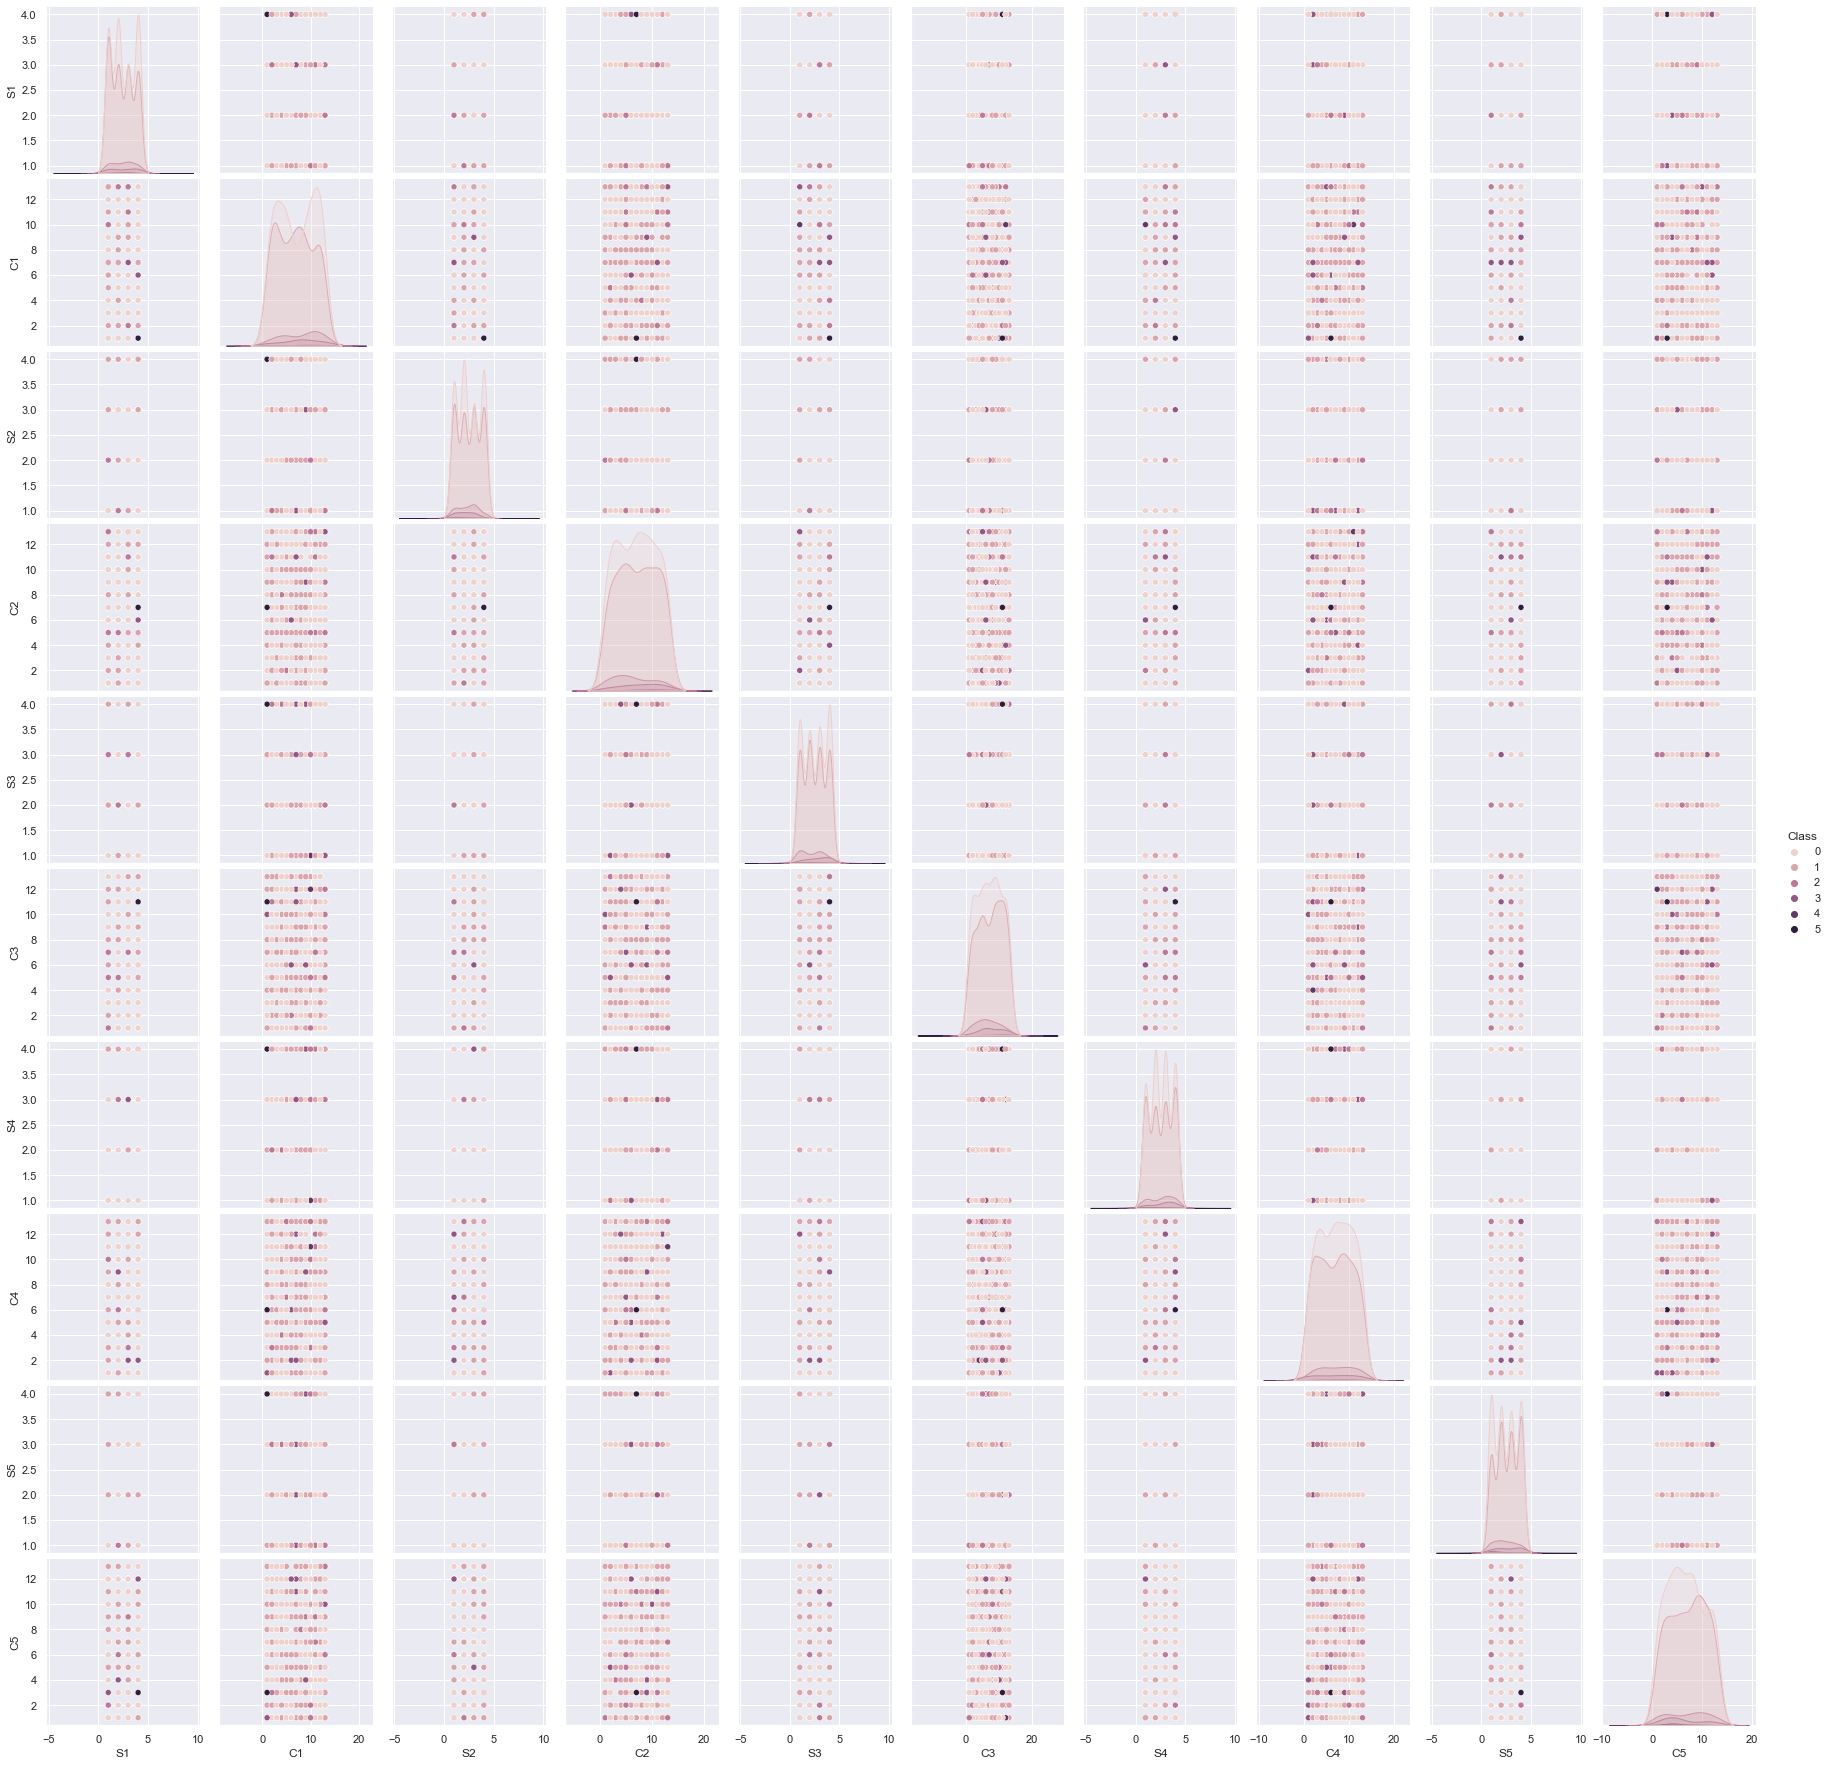

In [178]:
sns.pairplot(df, hue='Class')
plt.show()

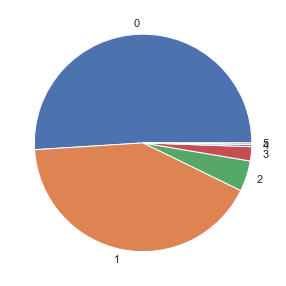

In [179]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [180]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S1,900.0,2.446667,1.147828,1.0,1.00,2.0,4.00,4.0
C1,900.0,7.031111,3.817460,1.0,3.75,7.0,11.00,13.0
S2,900.0,2.475556,1.124340,1.0,1.00,2.0,3.25,4.0
C2,900.0,7.067778,3.742381,1.0,4.00,7.0,10.00,13.0
S3,900.0,2.512222,1.132425,1.0,1.00,3.0,4.00,4.0
C3,900.0,7.123333,3.784123,1.0,4.00,7.0,10.00,13.0
S4,900.0,2.548889,1.115593,1.0,2.00,3.0,4.00,4.0
C4,900.0,6.977778,3.762344,1.0,4.00,7.0,10.00,13.0
S5,900.0,2.528889,1.123245,1.0,2.00,3.0,4.00,4.0
C5,900.0,6.885556,3.684621,1.0,4.00,7.0,10.00,13.0


#### Standardize the Data

In [181]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S1,900.0,-5.723816e-17,1.000556,-1.261053,-1.261053,-0.389357,1.354033,1.354033
C1,900.0,-1.006602e-16,1.000556,-1.580754,-0.859979,-0.008154,1.040245,1.564445
S2,900.0,-1.460560e-16,1.000556,-1.313105,-1.313105,-0.423199,0.689182,1.356611
C2,900.0,1.184238e-17,1.000556,-1.622270,-0.820195,-0.018121,0.783954,1.586028
S3,900.0,-1.440823e-16,1.000556,-1.336126,-1.336126,0.430977,1.314528,1.314528
C3,900.0,7.894919e-17,1.000556,-1.619064,-0.825837,-0.032610,0.760616,1.553843
S4,900.0,-9.671276e-17,1.000556,-1.389171,-0.492289,0.404594,1.301476,1.301476
C4,900.0,1.184238e-17,1.000556,-1.589727,-0.791909,0.005910,0.803728,1.601547
S5,900.0,-6.315935e-17,1.000556,-1.361893,-0.471120,0.419653,1.310426,1.310426
C5,900.0,2.960595e-17,1.000556,-1.598218,-0.783570,0.031077,0.845725,1.660373


#### Observations and Variables

In [182]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

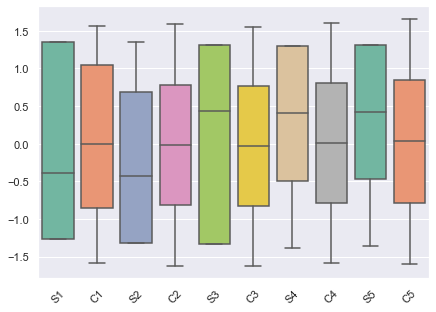

In [183]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

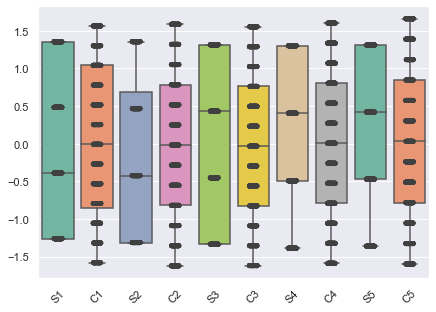

In [184]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

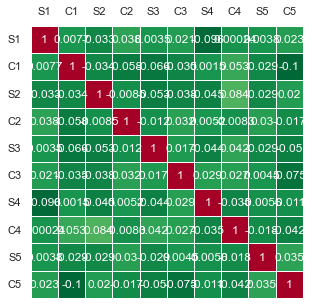

In [185]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [186]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [187]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.339493,-0.355225,-0.968361,-0.318827,-0.377120,-0.315645,-1.311101,-0.092728,1.190902,-1.151474
1,0.966670,1.480071,-1.881897,0.025454,0.547763,-0.037046,0.276187,-1.085053,0.077315,-0.662817
2,1.068250,-1.292346,-0.177031,1.050313,1.171704,-0.451182,0.278162,-1.904220,-0.975268,-0.632957
3,0.390673,1.252723,-0.051409,-1.509974,0.958950,1.239193,0.411575,0.907187,-0.296438,0.728901
4,0.011051,1.632401,0.926691,1.486629,-0.006085,1.980315,0.565268,-0.840677,-0.170133,0.706007
...,...,...,...,...,...,...,...,...,...,...
895,0.187101,1.079189,-0.844022,1.994920,1.182812,0.666087,-0.344538,1.219087,-0.168578,-0.373917
896,-2.505934,-0.574935,-1.616196,-0.287059,0.526775,-0.524761,-0.222344,0.153854,-1.394981,1.138471
897,1.801738,1.358851,1.266278,-0.431543,-0.483617,-1.232913,-0.651870,-1.421636,0.737833,0.075963
898,2.870255,-0.635346,-0.795645,-0.516572,0.514193,-0.102609,1.338434,0.624226,0.862384,-0.208034


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'10 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (11.6% expl.var)', ylabel='PC2 (11.3% expl.var)'>)

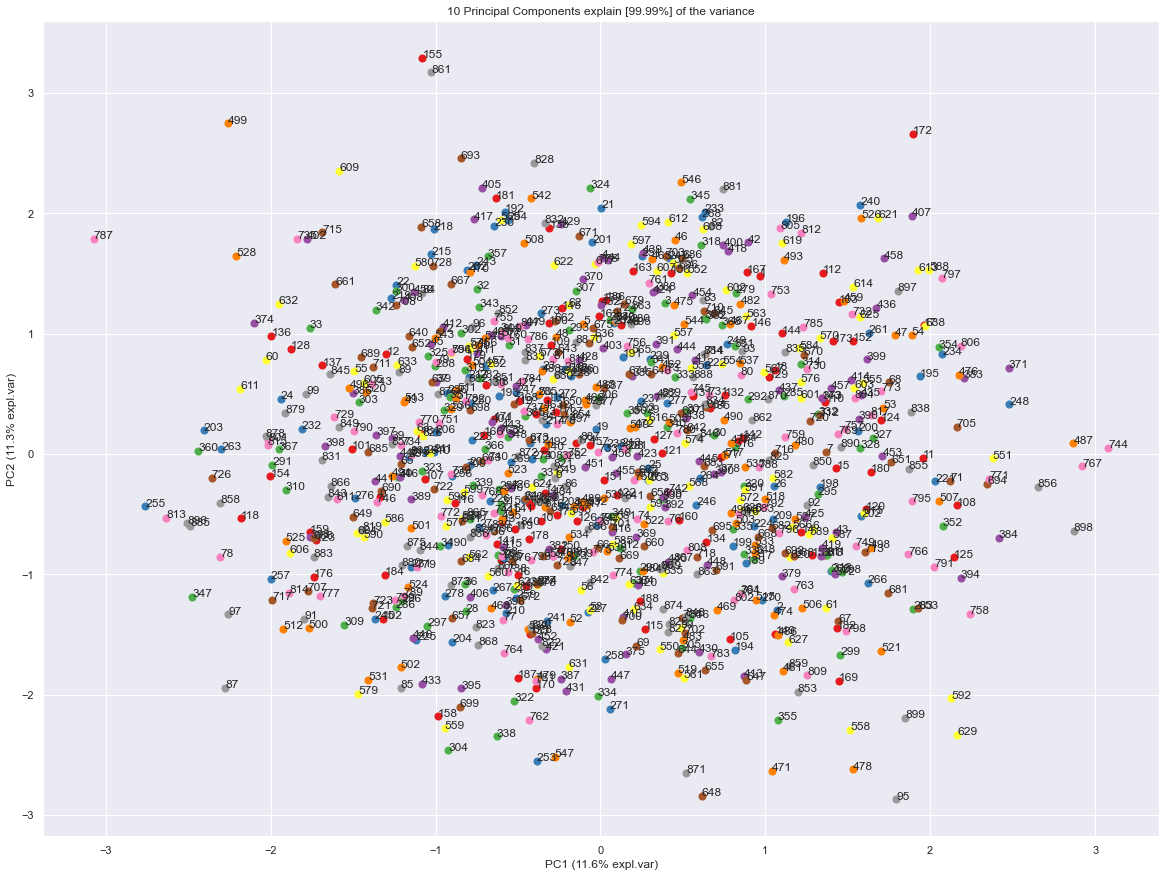

In [188]:
model.scatter(label=True, legend=False)

Eigenvectors

In [189]:
A = out['loadings'].T

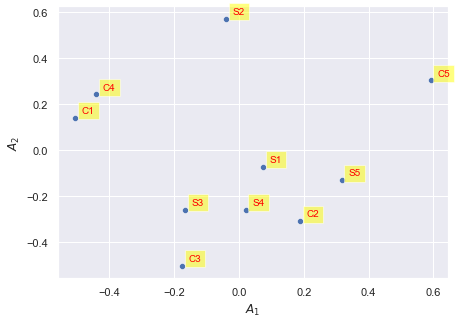

In [190]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

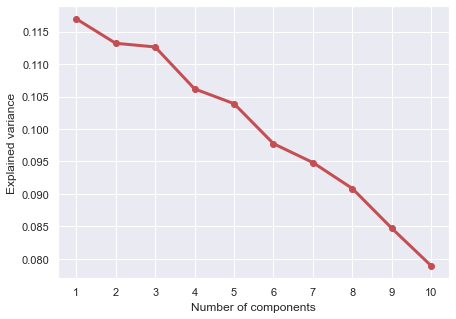

In [191]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

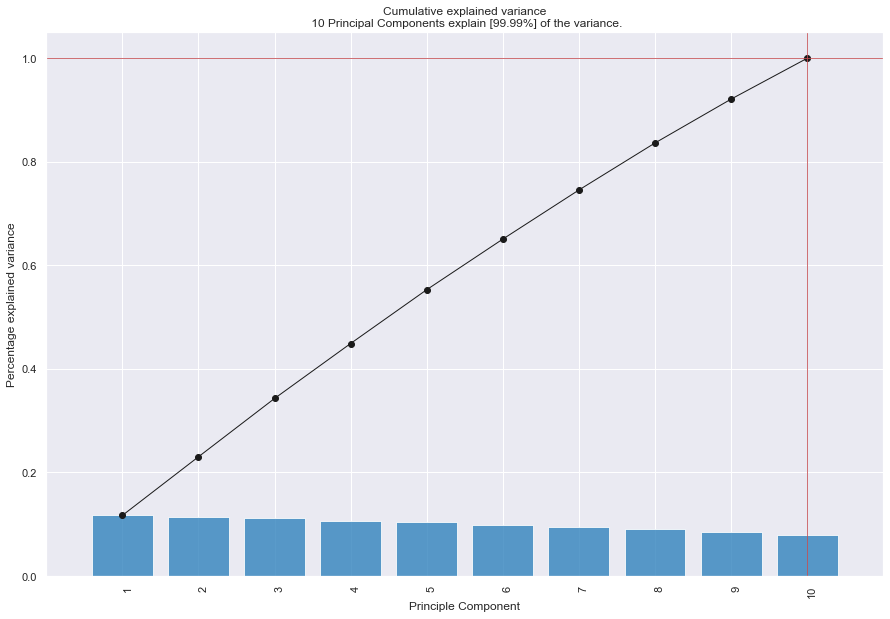

<Figure size 504x360 with 0 Axes>

In [192]:
model.plot();